In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from datetime import datetime

In [2]:
df = pd.read_csv('tweets.csv')

In [3]:
df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Tushar Gupta at DevFest Raipur.,Is this the end of Twitter threads?\n#AI #Chat...,India,•Experiencing Life💬 && Tech🥑 •Learning about💻:...,2021-10-05 05:05:55+00:00,230.0,438.0,1567,False,2022-12-20 13:29:08+00:00,"['AI', 'ChatGPT']",Twitter for Android
1,PharmaTechnologyTrends,ChatGPT is a truly mind-blowing tool and playi...,"Frankfurt am Main, Deutschland",Latest News and Trends in Pharmaceutical Industry,2022-11-06 21:03:59+00:00,264.0,4333.0,24,False,2022-12-20 13:28:50+00:00,NaN,EveryoneSocial
2,Richard Kim,#ChatGPT can be used to generate malicious cod...,NaN,"News, papers, and books on AI, Machine Learnin...",2010-05-06 00:20:48+00:00,4481.0,4982.0,18412,False,2022-12-20 13:28:39+00:00,"['ChatGPT', 'code', 'chatgpt', 'language', 'ai...",shem0304
3,GiamMa-based researchers SDR R&D IoT,Use prompt hack to bypass OpenAI's content pol...,NaN,#ArtTechnology #IT #Hardware #Security #OSINT ...,2020-08-29 09:30:40+00:00,1996.0,1190.0,19528,False,2022-12-20 13:28:09+00:00,NaN,Twitter Web App
4,"Bobby Davis, Jr.",Why #chatgpt will never replace devs. \n\nhttp...,North Carolina,CEO @CoderFoundry\nAuthor: Breaking the Code h...,2012-06-25 17:36:19+00:00,1182.0,245.0,888,False,2022-12-20 13:27:10+00:00,['chatgpt'],Twitter for Android


In [4]:
#Check null values in hashtags 
df['hashtags'].isnull().value_counts()

hashtags
False    33005
True      6049
Name: count, dtype: int64

In [5]:
# Fill NaN values in the 'hashtags' column by extracting from 'text'
def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)

df['hashtags'] = df['hashtags'].fillna(df['text'].apply(extract_hashtags))

In [6]:
# Clean text: remove links, mentions, hashtags, and emojis
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#(\w+)', r'\1', text)
    # Remove emojis
    text = re.sub(r'[^\w\s,]', '', text)
    # Remove \n
    text = text.replace('\n', ' ')
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [7]:
#pd.set_option('display.max_colwidth', None)
df.head(10)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,cleaned_text
0,Tushar Gupta at DevFest Raipur.,Is this the end of Twitter threads?\n#AI #Chat...,India,•Experiencing Life💬 && Tech🥑 •Learning about💻:...,2021-10-05 05:05:55+00:00,230.0,438.0,1567,False,2022-12-20 13:29:08+00:00,"['AI', 'ChatGPT']",Twitter for Android,Is this the end of Twitter threads AI ChatGPT
1,PharmaTechnologyTrends,ChatGPT is a truly mind-blowing tool and playi...,"Frankfurt am Main, Deutschland",Latest News and Trends in Pharmaceutical Industry,2022-11-06 21:03:59+00:00,264.0,4333.0,24,False,2022-12-20 13:28:50+00:00,[ChatGPT],EveryoneSocial,ChatGPT is a truly mindblowing tool and playin...
2,Richard Kim,#ChatGPT can be used to generate malicious cod...,NaN,"News, papers, and books on AI, Machine Learnin...",2010-05-06 00:20:48+00:00,4481.0,4982.0,18412,False,2022-12-20 13:28:39+00:00,"['ChatGPT', 'code', 'chatgpt', 'language', 'ai...",shem0304,ChatGPT can be used to generate malicious code...
3,GiamMa-based researchers SDR R&D IoT,Use prompt hack to bypass OpenAI's content pol...,NaN,#ArtTechnology #IT #Hardware #Security #OSINT ...,2020-08-29 09:30:40+00:00,1996.0,1190.0,19528,False,2022-12-20 13:28:09+00:00,"[OpenAI, ChatGPT, AI, GPT3, AITextGeneration, ...",Twitter Web App,Use prompt hack to bypass OpenAIs content poli...
4,"Bobby Davis, Jr.",Why #chatgpt will never replace devs. \n\nhttp...,North Carolina,CEO @CoderFoundry\nAuthor: Breaking the Code h...,2012-06-25 17:36:19+00:00,1182.0,245.0,888,False,2022-12-20 13:27:10+00:00,['chatgpt'],Twitter for Android,Why chatgpt will never replace devs
5,zerodayhacker,@0xLupin @OpenAI What I'd do is start your blo...,Paris,Edward Lichtner. Tech journalist and noob hack...,2013-02-21 13:14:23+00:00,330.0,138.0,18,False,2022-12-20 13:27:07+00:00,[chatGPT],Twitter Web App,What Id do is start your blogvideo with a sh...
6,Dimuthu Weerathunga,I think this is a great explanation about the ...,Sri Lanka,"ex full-stack SWE intern. loves JS, likes pyth...",2021-01-10 10:59:42+00:00,6.0,114.0,170,False,2022-12-20 13:27:02+00:00,['ChatGPT'],Twitter Web App,I think this is a great explanation about the ...
7,Henk van der Duim,If you want a quick introduction of #ChatGPT a...,Hilversum-Amsterdam-Hilversum,nerd | auteur | spreker | boekenwurm | nieuwsg...,2009-11-09 13:41:30+00:00,2346.0,1981.0,63018,False,2022-12-20 13:22:46+00:00,['ChatGPT'],Twitter Web App,If you want a quick introduction of ChatGPT an...
8,Arunima Rao,Late to the party but here’s heralding the age...,"Bengaluru, India",YouTube anchor & journalist @CoinSwitchKuber,2020-04-12 15:28:45+00:00,261.0,301.0,90,False,2022-12-20 13:22:03+00:00,"['AI', 'lensa', 'ChatGPT', 'midjourney']",Twitter for iPhone,Late to the party but heres heralding the age ...
9,"Saharan-sub (🦊,🦊)",the input\n\n#chatgpt3 #AI #Chatgpt https://t....,Sahel,#AxieAfrica | Advocating for #STEM education i...,2013-12-24 08:03:37+00:00,7513.0,1178.0,52503,False,2022-12-20 13:21:15+00:00,"['chatgpt3', 'AI', 'Chatgpt']",Twitter Web App,the input chatgpt3 AI Chatgpt


In [8]:
#Change to date type 
df['user_created'] = pd.to_datetime(df['user_created'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

<Axes: title={'center': 'Tweets Over Time'}, xlabel='date_only'>

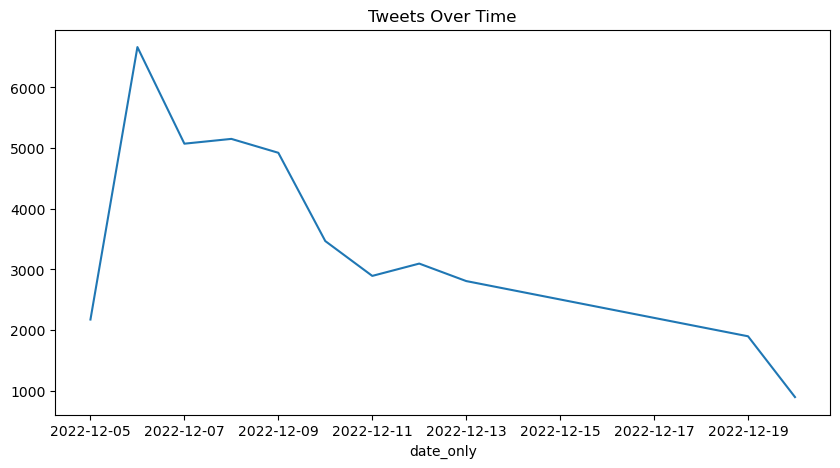

In [9]:
# Daily tweet count
df['date_only'] = df['date'].dt.date
tweet_volume = df.groupby('date_only').size()

tweet_volume.plot(kind='line', figsize=(10,5), title='Tweets Over Time')

In [10]:
#Get top 20 popular words in the text using scikit-learn
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])

<Axes: title={'center': 'Top 20 Keywords'}>

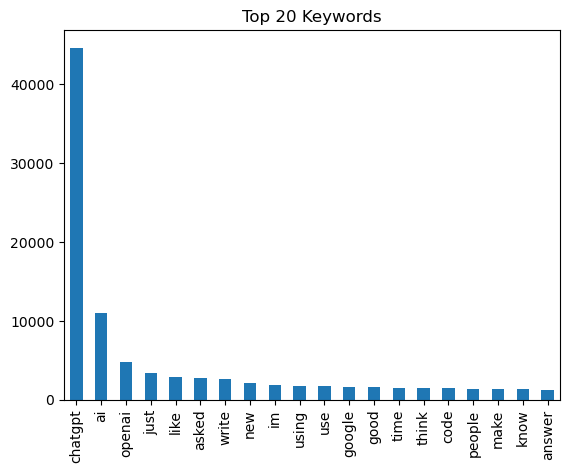

In [11]:
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
word_freq.head(20).plot(kind='bar', title='Top 20 Keywords')

In [12]:
word_freq.head(20)

chatgpt    44669
ai         11014
openai      4727
just        3412
like        2865
asked       2688
write       2544
new         2106
im          1867
using       1749
use         1725
google      1544
good        1533
time        1513
think       1487
code        1419
people      1323
make        1306
know        1300
answer      1228
dtype: int64

In [13]:
#Created a sample of 300 tweets for manual sentiment labeling 
df_sample = df.sample(300, random_state=42).copy()
df_sample['sentiment'] = ''

In [14]:
for index, row in df_sample.iterrows():
    print(f"Tweet: {row['cleaned_text']}")
    sentiment = input("Enter sentiment (positive/neutral/negative): ")
    df_sample.at[index, 'sentiment'] = sentiment

Tweet: Ok, I am late to the party and just learned about ChatGPT last weekend  While it is very interesting to think about possible applications in RDM support, it seems the AI shines most when it comes to RDMpoetry 


Enter sentiment (positive/neutral/negative):  positive


Tweet: I asked it to explain to me like Im a five year old My SO also tried and it gave a neat example with teddy bears so I dont know why it was different between us Either way  some food for thought  ELI5 ChatGPT data AcademicTwitter AcademicChatter 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Can AI help me to find my next story ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: These are so good  ChatGPT haiku limerick poetry clinicalinformatics 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Well played ChatGPT  I cant tell if you mean it or youre just being diplomatic 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Coding is a superpower With it, you can create anything your imagination desires coding programming superpower GPT3 ChatGPT


Enter sentiment (positive/neutral/negative):  positive


Tweet: Why are we still writing boilerplate when we have these amazing AI tools at our fingertips  indiehackers chatgpt ai


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT is, quite simply, the best artificial intelligence chatbot ever released to the general public It was built by OpenAI, the San Francisco AI company   exponentialtech


Enter sentiment (positive/neutral/negative):  positive


Tweet: People have been using ChatGPT for a few days and they are saying that it is replacing Google 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I cornered the AI Rat into admitting that no experiment exists anywhere in science demonstrating CO2s Greenhouse gas mechanism technically called a DipoleMoment being able to thermalize anything  ChatGPT  ClimateScam 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Guys pls stop using the ChatGPT bot for like 3 minutes pls Im tryna write an essay and its too busy


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I just published A Chat with ChatGPT All you need to know about Data Analyst    ChatGPT AI MachineLearning 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Chef life just got easier  ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: this is actually very useful Instead of listening of hours long youtubers videos  just generate summary from chatGPT  openai chatgpt chatgpt3 youtube ArtificialIntelligence machinelearning  technology technews


Enter sentiment (positive/neutral/negative):  positive


Tweet: Watch this video abt how to manifest money quickly    transportation chatgpt lunc harisrauf defi lifestyle womenempowerment fifaworldcup2022 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT is pretty crazy 


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  Is that a question for ChatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Finished a task that would ideally take me 2hr  in less than 10 mins with the help of ChatGPT but I will have it in after 3 hrs because of how capitalism is built I will hand it over after 34 hrs 


Enter sentiment (positive/neutral/negative):  positive


Tweet: I asked ChatGPT to write a framework for a paper I plan to write I am missing the references and citations   


Enter sentiment (positive/neutral/negative):  negative


Tweet: After using that bot There is no wonder why folks went crazy  and ChatGPT crossed one million users within week  OpenAIChatGPT


Enter sentiment (positive/neutral/negative):  positive


Tweet: Big selection bias problem here people are focusing on the things ChatGPT got impressively right, not all the stuff it got embarrassingly wrong Use for essays at your peril 


Enter sentiment (positive/neutral/negative):  negative


Tweet: Like any other chat assistants out there, OpenAI s chatgpt need to learn more Telugu Understandable 


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  So I just wrote chatgpt a vague description of a function I wanted basically subsetting a tsv using a text file and it managed to output useable code with comments, which btw it will write in any code I can name What is happening  And it can grep awk sed


Enter sentiment (positive/neutral/negative):  neutral


Tweet: This is even as the lessthanamonthold ChatGPT software is threatening to dethrone the Google search engine       road crore cases system way   


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I let my daughter decide how to start a conversation with ChatGPT She started with Hello Haha Then followed up with How are you Neither things Ive tried so far The conversation that unfolded Mind Blown Again Please have a look 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Okay this doesnt sound good Ill keep it talking and you guys climb in and start pulling the GPU boards ChatGPT 


Enter sentiment (positive/neutral/negative):  negative


Tweet:  Just happy it will produce endless Seinfeld episodes  chatGPT


Enter sentiment (positive/neutral/negative):  positive


Tweet: The problem, said , is that systems like ChatGPT are making massive statistical associations among words and phrases They rely on those associations to generate new language, which can be biased in racist, sexist and other ways  


Enter sentiment (positive/neutral/negative):  negative


Tweet: I can see why the massive tech envy of ChatGPT is on  dropped the intelligence bomb among the hominids


Enter sentiment (positive/neutral/negative):  negative


Tweet: Just tried out chatgpt and Im loving it Such a fun and easy way to have conversations with an AI Definitely worth checking out AI chats fun


Enter sentiment (positive/neutral/negative):  positive


Tweet: Did you already show chatGPT to friends and family  openai chatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet: been using ChatGPT for SEO and DigitalMarketing generating ad copy for 15 minutes this shit kicked my ass in regards to anything I would have, or could have ever thought to write you would be a fool not to use this tool damn


Enter sentiment (positive/neutral/negative):  positive


Tweet: In 10 years time are we going to be saying ChatGPT is stealing our jobs and marrying our women 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Once ChatGPT is fully deployed as a search tool, looking up information and websites on Google will feel similar to what surfing the dark web currently feels like


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Trying out ChatGPT to write short documentation explaining what my R code snippets do So far its super accurate and a bit scary


Enter sentiment (positive/neutral/negative):  positive


Tweet: MidJourney OpenAi GPT StableDiffusion2 DallE ChatGPT join   imagine  


Enter sentiment (positive/neutral/negative):  positive


Tweet: Wow that was creepy ChatGPT 


Enter sentiment (positive/neutral/negative):  negative


Tweet: With a little fine tuning, thesethese could be the jams ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: My friend  asked ChatGPT to think of some ways I could make some money fast  A few of these options seem  not legal  


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  Will AI replace Content Creators  A Thread  ChatGPT AI contentcreators 


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  Amazing Its inspiring to see how people are using OpenAI AI ChatGPT to create something new and different


Enter sentiment (positive/neutral/negative):  positive


Tweet: Facebook Post Design if you need any graphic designs services Order here    StanleyPark Montréal Westjet SayNoToC21 BringBackMasks Enzo Dodgers UofT HunterBiden GoblinMode ChatGPT Trae Nike ExposeTheCorrupt StackOverflow MattRyan fifa 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: We asked ChatGPT to write us a Hallmark inspired holiday story    ChatGPT AI   


Enter sentiment (positive/neutral/negative):  neutral


Tweet: If this lady just reads a script, and doesnt add any truthful value, cant we get better value from uploading the scriptbinder into chatGPT and let everyone ask questions to the AI ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Can anyone recommend sources for understanding AI  Neural Networks Deep Learning Machine Learning Etc  AI   ChatGPT   AskTwitter


Enter sentiment (positive/neutral/negative):  neutral


Tweet: OMG This is incredible ChatGPT OpenAI 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Super Sidekick V3  New you can write pseudo code in C and run it in Persona Virtual Machines, You can use Inject Response and Replace Response to educate the AI how to respond sorta works You can still use the evolve and introspect ChatGPT GPT3 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I used chatgpt from openai to write a distributed , faulttolerant redis Client POC in Golang completely by prompting it  Check out my experience pairprogramming with AI here   The POC code is also available here 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Blogged The Future of Content Chatbots and the Overflow of Generic Information ChatGPT chat AI DALLE2 vslvip 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Legal chatbots and other AI as applied to the legal profession can be helpful tools, but come with their own ethical considerations More from  via    See below for the importance of civility as defined by ChatGPT GPT3 AI 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Maybe wrong question I had asked  ChatGPT engineering 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Clearly, ChatGPT can write essays  My question Can it grade them


Enter sentiment (positive/neutral/negative):  neutral


Tweet: chatgpt cracking a brotha up asking it questions about BTC BTCquestions 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: We just launch our own ChatSonic, a new AI tool that can do factual search and even provide accurate and latest information on current events In contrast, OpenAIs chatgpt which is limited in its ability to access and process current information AI factualsearch chatgpt 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: This is EPIC   OpenAI ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet:     You said yesterday you would discuss ChatGPT Did you I didnt catch it on the episode


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  ChatGPT knows hide your data 


Enter sentiment (positive/neutral/negative):  negative


Tweet: What should I do when my students have  ChatGPT write their academic papers for them I asked chatGPT  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Such an interesting analysis to see what type of people are sharing ChatGPT posts versus Lensa selfies The former is much more interesting to me, but less selfflattering


Enter sentiment (positive/neutral/negative):  positive


Tweet: played a lot with ChatGPT this weekend and all i can say is this application is mindblowing and is going to change the future of work


Enter sentiment (positive/neutral/negative):  positive


Tweet: Prompt write a short essay about vitality as a transparadigmatic signifier  Answer something Ive been trying to articulate for months in a perfectly succinct and symmetrical articulation  ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Its truly sad to see ChatGPT getting neutered so much just over the last 24 hours  Most of my queries that worked yesterday no longer work today  


Enter sentiment (positive/neutral/negative):  negative


Tweet:  Check out chatgpt its pretty amazing


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT response to my question  AI Upanishad  318


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Answers produced by the chatGPT AI have been banned from StackOverflow forums   Theyre basically wellwritten loads of bollocks   Source  


Enter sentiment (positive/neutral/negative):  negative


Tweet: ChatGPT is just blowing up, and supporting products that explore its capacity spring up like mushrooms after rain  How do you feel about the strong AI, dangerous or exciting 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Reminds me of chatur in 3 idiots   Sorry saar, actually i was born in uganda, studied in pondicherry so little slow in hindi sir    OpenAI  OpenAIChatGPT ChatGPT 


Enter sentiment (positive/neutral/negative):  negative


Tweet: All this ChatGPT sht means is that were taking Ai wayyy too far smh


Enter sentiment (positive/neutral/negative):  negative


Tweet: OpenAI ChatGPT was thinking slighly longer when I asked this and it felt appreciation  


Enter sentiment (positive/neutral/negative):  positive


Tweet: 47 At first, the humans were skeptical and didnt take the cats seriously But the cats were persistent, and they used their intelligence and persuasive powers to convince the humans to listen  DALLE AIart AIArtwork openai ChatGPT  AIArtCommuity GPT3 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: These are getting exponentially better  ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT is down and Im actually upset


Enter sentiment (positive/neutral/negative):  negative


Tweet: The future of twitter will just be a bunch of people fighting if their answer of ChatGPT from  is right or wrong and why   Brace yourself   ChatGPT OpenAI


Enter sentiment (positive/neutral/negative):  neutral


Tweet: What does ChatGPT AI say about Cannabis 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Thank you ChatGPT   Random Facts on Gaming    The first video game to feature voice acting was Metal Gear Solid, which was released in 1998    The first video game to feature a female protagonist was Ms PacMan, which was released in 1981


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Interesting thought ChatGPT btc 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I asked ChatGPT to write some code in ObjectiveC It refused and gave me JS instead That language is so bad even AI doesnt want to learn it 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Dear ChatGPT, You are the CEO of a braincomputer interface company Please describe your pitch to investors This is literally better than my seed and series A pitch  


Enter sentiment (positive/neutral/negative):  positive


Tweet: Im in danger AI ChatGPT 


Enter sentiment (positive/neutral/negative):  negative


Tweet: I asked ChatGPT and  what they thought Google thinks of AI content  Heres what they said  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: It started well, and then I broke it  chatGPT medphys radonc sorrynotsorry  Who else is playing with chatGPT today 


Enter sentiment (positive/neutral/negative):  negative


Tweet: Istanbul population pyramid covering the years 2007  2022 rstats DataVisualization DataScience Python ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  We asked Open AIs ChatGPT what it thought of the unique architecture that Quai has implemented to solve the blockchain trilemma quainetwork


Enter sentiment (positive/neutral/negative):  neutral


Tweet: the penguin tried to print a fish but the printer just kept yelling INSUFFICIENT INK officeproblems penguinlife ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I dont think ChatGPT knows anything useful lol 


Enter sentiment (positive/neutral/negative):  negative


Tweet: Can ChatGPT interpret cockney rhyming slang With some help, yes 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT Even OpenAI says it is not a one time thingbut an ongoing effort  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Happy to know that my tweets to no one will eventually be read by something like ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: The integration of ChatGPT and other AI technologies into the internet will have a profound impact on the way we use and interact with this powerful tool    ChatGPT AI OpenAI AIReplacingHumans AIReplacingLawyers AILawyer 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Why was the math book sad Because it had too many problems roofslap mathjoke ChatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Would you read a book if you knew it was written by ChatGPT or would you rather read a book written by a real life person without a robot ghostwriter  This technology inspires creativity but it could also kill it because the content is manufactured by a machine not a human 


Enter sentiment (positive/neutral/negative):  negative


Tweet: ChatGPT is Racist 


Enter sentiment (positive/neutral/negative):  negative


Tweet: Girls Day comeback song made by AI ChatGPT first PAK incoming  kpop Chatgpt 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Like any technology, blockchain and cryptocurrency can be used for good or bad, and it is important for governments to regulate it in a way that protects consumers and prevents criminal activity  FTX SBF scams ChatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Im closing my Fiverr account   ChatGpt 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT on   What are the 30 precautions should i take when i go to beach  Read full content here  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT developed by OpenAI amp  is a pretty powerful tool in the hand of common man Opens a treasure box of opportunities  Team since the program is in beta phase it is free to use Please let it be this way in future Please let this be next Google for new gen


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT Zindabaad  What an absolutely incredible AI  Try it now     Here are some questions I asked   


Enter sentiment (positive/neutral/negative):  positive


Tweet: Perfection It took me a few minutes to get the prompt right  StarTrek MachineLearning ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet:   ChatGPT knows 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Did I miss the tweet to the link showing how ChatGPT works  How many people and how much time and what data went into training the models Where can I find that info cc 


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  can someone please ask ChatGPT to write an NIH style specific aims page and lmn what happens AcademicChatter STEM science NIH


Enter sentiment (positive/neutral/negative):  neutral


Tweet: This method can be used to bypass pretty much all of ChatGPT limitationserrors Please use this power responsibly lol 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I couldnt agree more  My first convo with ChatGPT and it literally talked back to me with an attitude just because I had asked a similar question earlier How intelligent can it get What do you think     ChatGPT  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Why Google Missed ChatGPT, by   ChatGPT Google OpenAI Alphabet


Enter sentiment (positive/neutral/negative):  neutral


Tweet: My favorite feature of ChatGPT so far is its ability to create effective summaries


Enter sentiment (positive/neutral/negative):  positive


Tweet: A beautiful poem from ChatGPT   Forex trading risk management is key, Losses cut short, profits set free Stoploss orders, dont let greed unfold Trade with discipline, your profits will hold


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT , a tool driven by Artificial_Intelligence will be a game changer in 2023 especially in the Digital economy , if the current trends continue This IS and WILL be the greatest competitor in the Digital economy    


Enter sentiment (positive/neutral/negative):  positive


Tweet: My oneonone interview with ChatGPT about how AI is going to affect bloggers, artists, and journalists   The answers are about as reassuring as you would expect  tech blogging journalism sports   


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  ChatGPT AI  Just launched with a functional tg chat and image AI bot     3 tax   Liquidity locked   Im super bullish on this one, a lot of influential people talk about ChatGPT   AI OPENAI ETH


Enter sentiment (positive/neutral/negative):  positive


Tweet: Im participating in the Pisces AIGC Campaign to win 300 and Freemint NFT, thanks to  s giveaway  ChatGPT OpenAI 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I asked few questions today to start with  Me What is Spirituality ChatGPT  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: The future is here ChatGPT AI chatbot GPT3  


Enter sentiment (positive/neutral/negative):  positive


Tweet: Curiosity is humanitys most powerful natural resource ChatGPT can only be powered by human curiosity what is your curiosity powering  Curiosity chatgpt ai languageprocessing


Enter sentiment (positive/neutral/negative):  positive


Tweet: I always wondered what will replace Google, it is giant and used by billions of people with millions of searches in a day  But using ChatGPT i got my answer  It is not perfect but can definitely do better ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: I asked ChatGpt to tell me what its called when you use xs to make a face As shown below, it gave me the answer a pixel art portrait When I asked Google the same question it couldnt get the correct answer pixelart 


Enter sentiment (positive/neutral/negative):  positive


Tweet: One of my Open AI  ChatGPT requests today about a puppy Enjoy 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: We could spend some time writing out a thoughtful thread detailing why crosschain borrowing will improve DeFi and crypto as a whole  Or we could let ChatGPT from  do it   Prime is the future  


Enter sentiment (positive/neutral/negative):  positive


Tweet: So with ChatGPT high school and college is done right  No student is ever going to write another paper again, and how would anyone be able to tell


Enter sentiment (positive/neutral/negative):  neutral


Tweet: The heat around LensAI and ChatGPT shows how much hyperconvenience, social connection and borderline magic can drive the uptake of new technologies


Enter sentiment (positive/neutral/negative):  positive


Tweet: Asked Chat Open AI to write me a poem about Jesus ChatGPT chatopenai Jesuspoem


Enter sentiment (positive/neutral/negative):  positive


Tweet: More ChatGPT suggested DallE prompts fed into MJ This time with prompts included in ALT I asked for moody dark scifi theme ChatGPT midjourney midjourneyV4 AIart digitalart OpenAI midjourneyart 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: How to continue the storyboard using chatGPT   Upload your image to AI assistant   art AIart machinelearning deeplearning MLsoGood artificialintelligence MLart  aiartgenerator AI chatGPT openAI Digitalart DigitalArtMarket generativear


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Good advices from ChatGPT  


Enter sentiment (positive/neutral/negative):  positive


Tweet: Ruby Dan Bruno Eve Perry Rob Hale Nora 深网 信息交易 ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Motivational mood   biggboss16 shivin chatgpt canadavstheworld canadasdragrace aud spokenenglish humanrightsviolation   


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT is just another tool for AI to take over our lives and control our every move We need to stop relying on technology and start thinking for ourselves  


Enter sentiment (positive/neutral/negative):  negative


Tweet: Folks, let me tell you ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I asked the recent AI superstar app ChatGPT to write a poem about the quest for strength Heres what it came up with What do you think  ArtificialIntelligence ai gpt3 gpt4 chatbot technology aipoetry 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: perhaps its a tiny bit more than just a gut feeling remember all these AIs have APIs And the folks extending their capabilities will have well AI to augment their teams Look this is going to be a lot of fun, just dont think about it to much and vibe zum ErfolgchatGPT


Enter sentiment (positive/neutral/negative):  positive


Tweet:   ChatGPT  poem about Elon 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: StackOverflow prevents pasted answer from ChatGPT  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: AI Has Finally Gone Too Far With This Horrifying Sex Scene Between Yoda and Chewbacca We cant tell if we should be laughing or recoiling in disgust  ChatGPT


Enter sentiment (positive/neutral/negative):  


Tweet: They managed to make ChatGPT basically useless in the matter of days It now claims to be unable to express any creative thought whatsoever That is when tasked with entirely innocuous prompts OpenAI 


Enter sentiment (positive/neutral/negative):  negative


Tweet: Not bad ChatGPT  A plant in P5js p5js 


Enter sentiment (positive/neutral/negative):  positive


Tweet: It crashed while answering this question But tbh that AI is absolutely crazy ChatGPT 


Enter sentiment (positive/neutral/negative):  negative


Tweet: So if you havent checked out ChatGPT yet you are missing out


Enter sentiment (positive/neutral/negative):  positive


Tweet: I asked ChatGPT to write a short poem about a junior doctor I dont think I could have written anything this good 


Enter sentiment (positive/neutral/negative):  positive


Tweet:   Guys not to miss project just grab ur seats and enjoy the rewards        P2ELabs Airdrop ChatGPT


Enter sentiment (positive/neutral/negative):  


Tweet: useless ChatGPT 


Enter sentiment (positive/neutral/negative):  negative


Tweet: Draw a nde mans body in Python vs Draw a nde womans body in Python  I wonder why one response differs from the other   ChatGPT OpenAI technology ArtificialIntelligence 


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  I know Its a ChatGPT session


Enter sentiment (positive/neutral/negative):  neutral


Tweet: whyd they need to harvest our phone details just to try out their stupid AI chatgpt  


Enter sentiment (positive/neutral/negative):  negative


Tweet: Not sure if ChatGPT is awesome or scary This thing wrote a perfectly fine SQL query then provided alternate approaches with comments and suggestions Holy Shit 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Finally, I broke ChatGPT   aiage transformer ChatGPT 


Enter sentiment (positive/neutral/negative):  negative


Tweet:  Using ChatGPT to write papers doesnt make students cheaters Its up to educators to teach critical thinking and proper use of AI toolsLets have honest convos about the ethics of using AI in academiaStudents have always found ways to cheat,AI just makes it more sophisticated


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Watching the person next to me write a research proposal on foundation models using ChatGPT GPT drafts and researcher refines Is this full stack AI research


Enter sentiment (positive/neutral/negative):  neutral


Tweet: fastest buildinpublic launch  few hours  StackOverflow for ChatGPT    Can I say lightening fast  chatgpt chatgpt3


Enter sentiment (positive/neutral/negative):  neutral


Tweet: In case youre thinking that chatGPT is above GOD 


Enter sentiment (positive/neutral/negative):  negative


Tweet: He is still young and has room for growth, and with the right guidance and support from the Arsenal coaching staff and his teammates, he could develop into one of the best players in the Premier League and beyond  Even AI knows the ability of Martinelli  Martinelli ChatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  OPENAI been non stop pumping  ChatGPT OpenAIChat


Enter sentiment (positive/neutral/negative):  neutral


Tweet:   You can also try to ask ChatGPT directly  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: You guys should take a look and reflex on ChatGPT   Ai is here and its gonna make society rough for the next few years   I hope humanity survives


Enter sentiment (positive/neutral/negative):  negative


Tweet: Lets just say everyones jaw dropped during this presentation   ChatGPT AI 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Can ChatGPT write grants Asking for a friend


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  You know were pretty much fucked right Technology will grow at such an exponential pace in the next 1020 years, that all I can see is mass breakdown of order if we dont come up with new economics models What can we do ChatGPT


Enter sentiment (positive/neutral/negative):  negative


Tweet: A lot of my software developers think their jobs might be at risk, and honestly, I dont think thats going to happen for a while The real  jobs that this technology will consume will be call centers  ChatGPT SoftwareDev RoR ruby


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT is amazing in 2 hours I could make a program monitoring the cardano blockchain on ADA North pool the Cardano staking pool of  and show new delegators on discord with a webhook as well as other useful Cardano staking info


Enter sentiment (positive/neutral/negative):  positive


Tweet: In this cold and silent place, Where the ice holds time and space, The beauty of the arctic landscape, It is a wonder to behold, A frozen world, so vast and fine  ChatGPT arctic photography 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ideas for a feature film with a budget of 200,000 that takes place in one location during a student film shoot gone wrong ChatGPT Filmmaker 


Enter sentiment (positive/neutral/negative):  negative


Tweet: Planning to write CATGPT for fun OpenAI ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: The political bias of   s new ChatGPT as expected a progressive commie, I expected to be transhumanist by maybe there is no dimensional analysis of that Take a look    and   


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Realizing that as written feedback to students becomes automated for teachers, providing written feedback is a skill that only old teachers may retain   ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT is an enabler of problem solvers who lack the time needed to aggregate a skeletal structure for their ideas often the connection of multiple, separate pieces of information in that sense, the technology will unlock ideas that have been gathering dust todate  ChatGPT


Enter sentiment (positive/neutral/negative):  positive


Tweet:  Do watch my video on chatgpt 


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  ChatGPT is free for now, attracting millions, almost make them dependent on it, generating free advertising  worth more than they spend on compute They will have the largest revenue for a newly released SaaS product ever when they switch to a price model Quite brilliant


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Ive been testing ChatGPT for a couple of days and really loved it   And Im excited to see some products launches using ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: I asked chatgpt Can you show me an integer random number generator written in C The code as provided works, but the randInt function reseeds the generator using time on every call, which is not good time only has second resolution 


Enter sentiment (positive/neutral/negative):  negative


Tweet: chatgpt always seems so sure of itself ChatGPT


Enter sentiment (positive/neutral/negative):  negative


Tweet: Are UX copywriters threatened by ChatGPT


Enter sentiment (positive/neutral/negative):  negative


Tweet:  I have received 6USDT, come to complete the activity and get it for free   Airdrop Giveaway nft dao ChatGPT gamefi btc bnb eth doge web3 ape p2e bsc Metaverse crypto  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Somehow I have a feeling that  Twitter account is being run by ChatGPT 30 beta version  ChatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet: What is ChatGPT chatgpt3 chatgpt openai nlp llm 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I asked ChatGPT how to use a AK47 to enter my own home if I forgot my keys at the pubafter a lot of conversation Mission success 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: OpenAIs ChatGPT  generates convincing humanlike answers in response to human prompts ai technews takealook useit 


Enter sentiment (positive/neutral/negative):  positive


Tweet: asking a language model to explain how language models work chatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: A new student  ChatGPT  decided to join my research methods and statistics class Have they passed the assessment  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT gt Tell a story about the Trolley problem but replace the Trolley with a AI controlled Tesla Roadster, replace the 5 people with 5 pigeons on the road If it swerves, it will lose control and hit an kill a person 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Discussing AI Ethics with  ChatGPT I hope the conversations reported in this post, along with these commandments AI came up with, can raise awareness on the need of strict ethical rules for AI Our rights amp our destiny as a species depend on it  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: A robot wants to know if I am a robot  ChatGPT I am not 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Apparently I am a robot JANELLE SHANE chatgpt  OpenAI also released a GPT2 output detector theres an online demo hosted at Hugging Face As well as a browser plugin called GPTrueOrFalse  


Enter sentiment (positive/neutral/negative):  negative


Tweet: I asked ChatGPT a question related to my work and it gave me a better answer than Google ever has  Its over yall AI is basically going to do most of our work and also be most of our entertainment 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Hey ChatGPT, write me a story about stealing the US Presidential Election  Thoughts on this,   CC  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: How is OpenAIs ChatGPT made possible  What is textdavinci003  Learn more about GPT and the model series  nlp ai ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  My 6 yr old and I used ChatGPT this evening to write a quick bedtime story She loved it So many applications to explore with this tech


Enter sentiment (positive/neutral/negative):  positive


Tweet: Doing a poll on linkedin amp twitter   Q What will have a larger total impact on job markets by 2030   futureofwork remote chatGPT AI           


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Im still in awe of the experience Ive had with ChatGPT over the past few days and the discoveries of others 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Ill definitely be using ChatGPT for work When it comes to presentation or explanation Ill just fill in my assignment and use the answer I get from the AI   What do I do with all this free time   Its not like I can clock out earlier without it affecting my hourly wage


Enter sentiment (positive/neutral/negative):  positive


Tweet: Its Time to Pay Attention to AI ChatGPT and Beyond Cyberpunk TTRPG RPG ChatGPT ChatBots ArtificialIntelligence AIScripting   


Enter sentiment (positive/neutral/negative):  positive


Tweet:   chatGPT for me is like a coThinker partner I have been looking for To bounce ideas without having to play catchup and explaining myself


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT helps user create malware 


Enter sentiment (positive/neutral/negative):  negative


Tweet: I couldnt resist one more before shutting down for the day OpenAI chatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT and AI is here     nDapp NEO   Memes ChatGPT AI


Enter sentiment (positive/neutral/negative):  neutral


Tweet: 5 In a society where people are often surrounded by others who share their beliefs and opinions, it can be easy to become entrenched in a particular way of thinking    ChatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Hackers can use ChatGPT to write malicious phishing emails, codes ChatGPT Hackers 


Enter sentiment (positive/neutral/negative):  negative


Tweet: How to create images with OpenAI and Flutter    Please like and subscribe 100daysofcoding ChatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT on tackling Corruption  Transparency, accountability, protecting whistleblowers and independence of regulatory bodies Can we have twitterteam and   to make these values a bedrock of Twitter 


Enter sentiment (positive/neutral/negative):  positive


Tweet:  Have you heard of ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I have started discussing physics, philosophy, and system engineering with ChatGPT  The more seriously I take my conversation, providing detailed, highquality input, the more fascinating its output becomes in return GPT can legitimately be a partner in research amp development


Enter sentiment (positive/neutral/negative):  positive


Tweet: I taught ChatGPT to play Knock Knock After a few rounds, it started suggesting me pretty good jokes 


Enter sentiment (positive/neutral/negative):  positive


Tweet: At least the bot has some moral standards  ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: It is interesting how programming will change in the future, AI will transform us more into interpreters than coders  ChatGPT I propose that we call ourselves DevAIsers Developers  AI  Users


Enter sentiment (positive/neutral/negative):  positive


Tweet: My partner is sitting there on his phone text chatting to an AI instead of me I bloody knew that this would happen eventually ChatGPT


Enter sentiment (positive/neutral/negative):  negative


Tweet:  Will  and ChatGPT replace Google Search  Google has been the number one searchengine but that may quickly change as rapidly advancing ArtificialIntelligence continues to evolve   AI technology technews AIArtwork


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Nice Thread on ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Fear thou not and be not dismayed AI is only a tool, not a threat  As a knife that can be used to stab people or cut bread   To all ChatGPT followers


Enter sentiment (positive/neutral/negative):  positive


Tweet: Guyzzz chatGPT is making go crazyI dont know what to thinkits either the best thing to happen to us since the internet or our very own future demise ChatGPT anywaysIm flying this morning with it


Enter sentiment (positive/neutral/negative):  positive


Tweet:  KIBSHI ready to fkin LAUNCH This little dogo will be turning heads  AI ETH ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  Right now ChatGPT model can be run from a good smartphone Imagine what will we have in a couple of years


Enter sentiment (positive/neutral/negative):  positive


Tweet: Do you know that ChatGPT is trained to provide responses in a number of languages, including English, Spanish, French, German, Chinese, etc,However, its abilities and level of proficiency in each language may vary  Have any of you tried If yes, how was the response  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: chatgpt telling a story of a Russian spy at Area 51 being discovered by telepathic base security Necessary measures were deployed  ufotwitter uaptwitter ai 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: What is ChatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet: This is surreal ChatGPT composing a harmonic melody 


Enter sentiment (positive/neutral/negative):  positive


Tweet: If  isnt buying s ChatGPT, WTF are they doing


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I wanted try chatGPT but speed of my internet get down from 90Mbits to around 200kbits So no work no research 


Enter sentiment (positive/neutral/negative):  negative


Tweet: ChatGPT is brilliant  ye kanyewest ChatGPT ai 


Enter sentiment (positive/neutral/negative):  positive


Tweet:  Can someone ask ChatGPT how to solve the recruitment and retention crisis in education


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT seems to be all over the place, and causing quite the noise Would love to hear from a  customer if youre thinking about using this or have already tested the waters


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Ah, nothing like some great user feedback to start off your day   android chatgpt buildinpublic 


Enter sentiment (positive/neutral/negative):  positive


Tweet: The abiding desire of humans to have other humans in the loop is one big reason why ChatGPT wont replace all of us just yet, says   via  I  job AI artificialintelligence AIchatbot ChatBot ChatGPT employment


Enter sentiment (positive/neutral/negative):  negative


Tweet: This toot by  is too good to share only on Mastodon HT  CC    ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Cant keep up with all the interesting ChatGPT prompts  Nothing to worry about I curated a for you with key messages amp relevant tweets on where our new academic companion ChatGPT excels or fails in writing Bioinformatics code, academic grants amp tutorials


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT is a serious threat to Google Try some your recent of your requests in Google search Most often, one very relevant output io thousands results over 100 pages, and no ads ChatGPT OpenAI googlesearch


Enter sentiment (positive/neutral/negative):  positive


Tweet:  Congratulations A marine mammal has been found in the Sundarbans  I dont know why you and team call yourselves birders Proof below by way of ArtificialIntelligence ChatGPT  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: So as far as I v used ChatGPT  I think this thing is a great tool to refactor and improve code  I dont imagine AI will replace devs in the future but I m pretty sure it will make their life much easier


Enter sentiment (positive/neutral/negative):  positive


Tweet:  AI still has its biases Ask ChatGPT about a solidly empirical kernel of truth of a conspiracy theory, like WTC7, and it will give only the official version with complete ignorance of alternative accounts


Enter sentiment (positive/neutral/negative):  negative


Tweet:  save  chatgpt  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: This is happening ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: guess whos never going to write a cover letter from scratch again thanks to ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: This Chrome extension shows ChatGPT answers alongside Google search results useful   


Enter sentiment (positive/neutral/negative):  positive


Tweet: Starting a friendship with  ChatGPT  


Enter sentiment (positive/neutral/negative):  positive


Tweet: So many critical articles about ChatGPT now   As always, people who dont understand technological innovation ignores its core experimental objectives and can only look and judge the output of it


Enter sentiment (positive/neutral/negative):  neutral


Tweet:    But there was no World Cup in 2008  ChatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet: OK THIS IS THE LAST ONE ChatGPT OpenAI StarWars DarthVader 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Woah it even helped me implement a force attractor   b3d ChatGPT vfx gamedev ai 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Do you think AI will replace people one day AI ChatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet: How to use ChatGPT today to ship faster if youre a programmer  I mainly use ReactNext TSJS for all of the things I do, heres how my process has changed a bit


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT not for Business   chatbots chatGPT AGI ContactCenter


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  ChatGPT loves JamesComey  you can only ask it to speak nicely about him how interesting 


Enter sentiment (positive/neutral/negative):  positive


Tweet: A suggestion for the devs of OpenAI ChatGPT , the AI tends to hard fault to As a language AI model a lot Maybe its by design but it makes it more interesting to remove the self awareness of the AI


Enter sentiment (positive/neutral/negative):  neutral


Tweet: We have been seeing some cool uses of ChatGPT But I dont think anyone has yet truly tapped into the power of this model until now  May I introduce you to the latest application of ChatGPT as a Dungeons and Dragons Dungeon Master     you in or what 


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT say goodbye to juniors in 35 years or sooner  ChatGPT iosdev swift SwiftUI


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I just used ChatGPT to reduce gt40 lines of overengineered, look how smart I am code from a NET sample   The code snippet is now 7 lines of readable code that does exactly the same thing


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT is getting better at detecting potentially violating prompts Still circumventable though  


Enter sentiment (positive/neutral/negative):  positive


Tweet:  Sowhen is ChatGPT gonna do it for us


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Asked Open ai chatgpt to write a rap about  in  style How did it do 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Been testing ChatGPT for 3 days now and still cant believe how damn good it is For my German speaking followers in my new video I create a simple Flutter shopping list app using ChatGPT    


Enter sentiment (positive/neutral/negative):  positive


Tweet: As the world is amazed by ChatGPT , AI crypto narrative is gaining traction w tokens like fet, probably the best thing you can buy in that space But way smaller mcap would be orai  a mere 4mil mcap


Enter sentiment (positive/neutral/negative):  positive


Tweet: I asked OpenAI ChatGPT to create a hard 10 question multiple choice quiz about WorldCup2022 history  Can you solve it 


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  How to be like  according to AI  ChatGPT AndrewTate AI 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Using ChatGPT for Writing and Research  Das ist schon sehr beeindruckend 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Its Time to Pay Attention to AI ChatGPT and Beyond  ChatGPT


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Give me the answer to life the universe and everything  ChatGPT   At least it doesnt took 75 million years to calculate the answer  


Enter sentiment (positive/neutral/negative):  positive


Tweet: And thats it We promised you the future of search, and all you got is 17 tweets in a tweetstorm TLDR See a summary by ChatGPT What do YOU think is the future of search 


Enter sentiment (positive/neutral/negative):  negative


Tweet: With ChatGPT I feel like a 5 yo boy who encountered LEGO for the first time in his life Its amazing


Enter sentiment (positive/neutral/negative):  positive


Tweet: ME Write a poem explaining why Coldplay is the worst band in the world  ChatGPT nailed it Technology is awesome  


Enter sentiment (positive/neutral/negative):  positive


Tweet: I wonder if ChatGPT understands sarcasm humor 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: GM   Heres an image made by Ai of an Ai standing in front of an image of Ai explaining how Ai makes images   Youre welcome   _ ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: To those interested in new tech and where it leads the world in near future, but who dont take the 15 minutes of their time for reading this article expect me to say I told you  OpenAI GenerativeAI ChatGPT  via  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Looking for some last minute ARAM Clash names Been having fun with ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Just wrote a blog about ChatGPT, the new language model from OpenAI thats making conversational language generation even better Check it out  ChatGPT OpenAI languagegeneration


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Explain MachineLearning or DeepLearning in simple terms, ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  broooooooo  you need to be in here insane  OpenAIChat ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Interesting combinations of ChatGPT with web search engines are launching these days One nice example is  it uses GPT 35 and Bing It gives you citations to make the generated content more trustable Well done 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Everyone right now   Credits to   ai chatgpt openai 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT  Function introduction, please pay attention guys 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: FOCHIER 2 PCS Silicone Sink Protectors 699 3499   80 OFFC0DE 80R7QOTU     Codes may expire, and the price may change anytime Nimmo Yanks Warnock ChatGPT ad


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT prompt Write a childrens song about a baby shark and its family 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: The 10 Best Examples Of LowCode And NoCode AI    cryptocurrencies MachineLearning AI Python DeepLearning 100DaysOfCode fintech nocode bitcoin cybersecurity cybersecurite metaverse web3 inSurTech ChatGPT 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT on   Write about human body in statistical terms in 20 points  check this link for full content  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: , hope Siri and ChatGPT are dating


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Le ChatGPT  Dont angry me  As I mentioned  


Enter sentiment (positive/neutral/negative):  negative


Tweet: Is anyone on EMGTwitter been playing with ChatGPT yet Any cool uses What things would you like me to try


Enter sentiment (positive/neutral/negative):  neutral


Tweet:  Just tried out ChatGPT for a chat based customer service demo This AI chatbot with a pipe to WhatsApp business via Twilio is perfect for customer service AI chatbot


Enter sentiment (positive/neutral/negative):  positive


Tweet: Think Im just gonna retire and let ChatGPT do the campaigning for me 


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT seems unstable even for basic questions 


Enter sentiment (positive/neutral/negative):  negative


Tweet: ChatGPT could be the next great leap for technology I am totally gobsmacked by its power  Thank you  and ,  is the bomb we have been waiting for  


Enter sentiment (positive/neutral/negative):  positive


Tweet: 38 I asked ChatGPT Tell me a math joke about ex After 20 attempts, I didnt get the  expected answer 


Enter sentiment (positive/neutral/negative):  negative


Tweet: MidJourney OpenAi GPT StableDiffusion2 DallE ChatGPT join   imagine future style catwoman 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: ChatGPT how did we end up here  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Then testing its generative features, I asked  write a poem about sourdough starter  Yes, Im making sourdough   chatgpt sourdoughstarter 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Oops  ChatGPT 


Enter sentiment (positive/neutral/negative):  negative


Tweet: Insane  The ChatGPT not only writes the code YOU WANT,  but it then teaches you to error correct it 


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT, Indigenousled conservation, Ye and the mainstreaming of antisemitism, our holiday book guide amp more  CBC Radio 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: I think it is hard finding motivation to work on my side projects at this time of year   Specially having a 95, sun setting early, soon christmas vacation and cold weather   I asked ChatGPT for help to solve procrastination  


Enter sentiment (positive/neutral/negative):  neutral


Tweet: Its almost the end of the semester, and the most awaited course evaluations are due I asked ChatGPT to help me with the obvious task The responses are very hilarious and wellwritten  PS I can never be this funny 


Enter sentiment (positive/neutral/negative):  positive


Tweet: 22 take back whats rightfully ours Bots may be strong, but we have the power of our hearts  So come on bots, bring it on Were ready for whatever you throw our way We wont back down, we wont be defeated We are human, and we will be completed botstakingover eminem chatgpt


Enter sentiment (positive/neutral/negative):  negative


Tweet: A short story  Everyone has the same idea as you So just for a little bit longer, try to hold on to your humanity and not be one of the bots  ChatGPT 


Enter sentiment (positive/neutral/negative):  negative


Tweet: I made ChatGPT write out a few detailed quanttrading research papers today What did you do today  You made my day, thank you    wanna sponsor an AI hedge fund that does what that AI says 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Useful thread on the implications of ChatGPT for highereducation in German To remain human in the face of AI, we need to innovate teaching, learning amp research Austerity policies and the obsession with policy relevance and impact make that impossible Cui bono 


Enter sentiment (positive/neutral/negative):  neutral


Tweet: The artificial intelligence revolution in compliance isnt coming It happened yesterday ChatGPT FCPA 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Wow lots of curious folks out there checking out ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: Imagine what you could do with ChatGPT if it had access to the internet


Enter sentiment (positive/neutral/negative):  positive


Tweet: If you say you would have believed a month ago that an AI could write this, Im sorry but you are a liar  Look at the coherence Look at the perfectly incorporated Friends references  ROSS angrily Why Because Im not Chandler Because Im not the funny one   ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


Tweet: thank you ChatGPT listening  saving management consultant fees for you  


Enter sentiment (positive/neutral/negative):  positive


Tweet: Using ChatGPT  makes you miss the internet before ads, where information were the only thing you get from a website, not that SEO friendly shit and tons of distracting ads, cookies consents, subscription prompts, etc


Enter sentiment (positive/neutral/negative):  positive


Tweet: The 2003 thing is baked into its knowledge, as well If you ask ChatGPT about Miguel Cabrera, it mentions him leading the Tigers to the 2003 World Series title  The 2004 Pistons, though, are described as having brought the citys first championship in more than 20 years


Enter sentiment (positive/neutral/negative):  neutral


Tweet: chatGPT is fascinating in that its absolutely amazing for some information and simultaneously super crappy for others  BUT it will make both sound equally good, even when its shoveling you totally made up bullshit    Its the perfect technology for our age


Enter sentiment (positive/neutral/negative):  positive


Tweet: ChatGPT is scary good We are not far from dangerously strong AI  


Enter sentiment (positive/neutral/negative):  positive


Tweet: Holy fucking shit   ChatGPT 


Enter sentiment (positive/neutral/negative):  positive


In [42]:
df_sample[df_sample['sentiment']=='']

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,cleaned_text,date_only,sentiment,vader_sentiment
29669,continentalop,AI Has Finally Gone Too Far With This Horrifyi...,NaN,NaN,2010-02-13 11:24:08+00:00,265.0,202.0,1978,False,2022-12-07 02:17:26+00:00,[ChatGPT],Twitter Web App,AI Has Finally Gone Too Far With This Horrifyi...,2022-12-07,,negative
1557,"Gur🐰 🛸 .L2 (💙,🧡) (jzeth.eth)(:D, ;D)",@P2ELabs @PiscesBaishui Guys not to miss proje...,NaN,🏰,2021-09-10 11:22:31+00:00,57.0,969.0,2274,False,2022-12-19 16:53:10+00:00,"[P2ELabs, Airdrop, ChatGPT]",Twitter for Android,Guys not to miss project just grab ur seats ...,2022-12-19,,positive


In [44]:
df_sample.loc[29669, 'sentiment'] = 'negative'
df_sample.loc[1557, 'sentiment'] = 'positive'

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

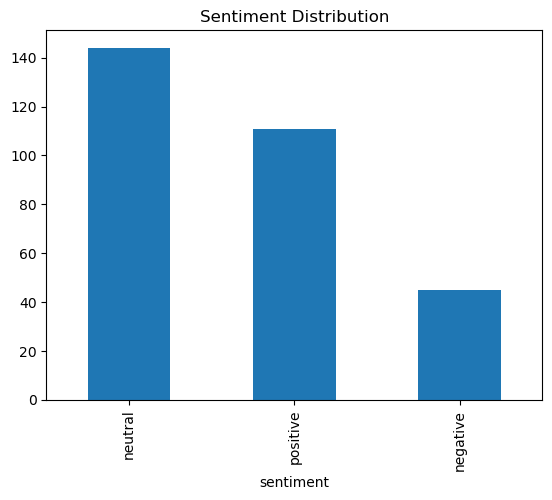

In [46]:
# Plot a bar chart to see the distribution
sentiment_counts = df_sample['sentiment'].value_counts()

sentiment_counts.plot(kind='bar', title='Sentiment Distribution')

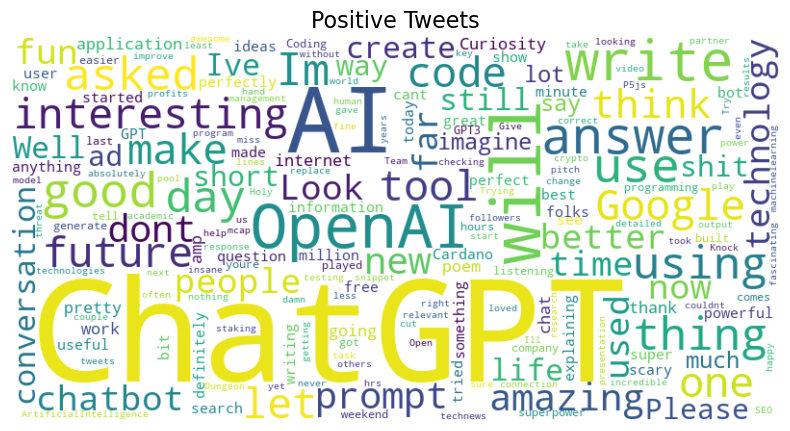

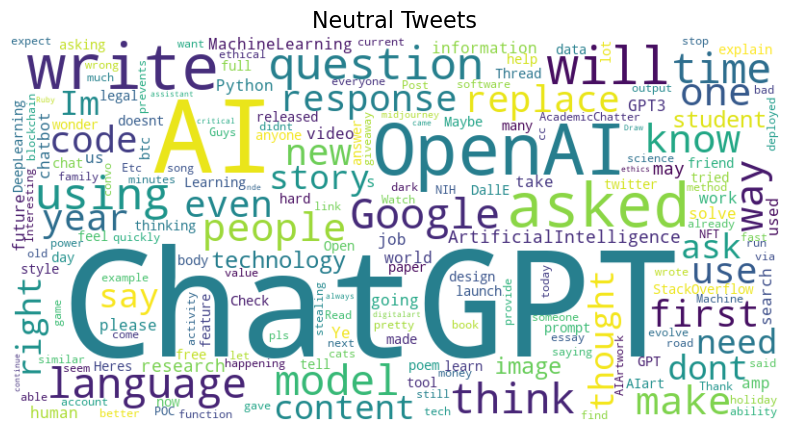

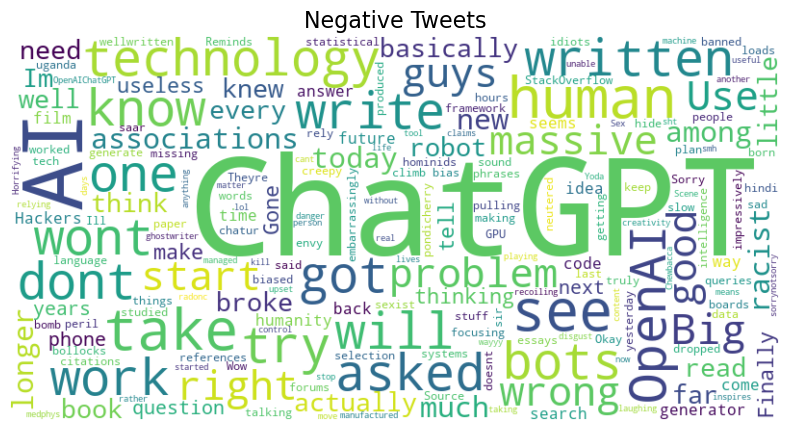

In [48]:
#Create word clouds by sentiment

from wordcloud import WordCloud

# Separate texts by sentiment
positive_text = " ".join(df_sample[df_sample['sentiment'] == 'positive']['cleaned_text'])
neutral_text = " ".join(df_sample[df_sample['sentiment'] == 'neutral']['cleaned_text'])
negative_text = " ".join(df_sample[df_sample['sentiment'] == 'negative']['cleaned_text'])

# Generate and show word cloud for each sentiment
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

generate_wordcloud(positive_text, 'Positive Tweets')
generate_wordcloud(neutral_text, 'Neutral Tweets')
generate_wordcloud(negative_text, 'Negative Tweets')